In [1]:
import os
import random
import cv2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Analyse du jeu de données

Il y a 2 dossiers :
- **leftImg8bit** : contient les images RGB d'origine
- **gtFine** : contient les masques de la segmentation d'images

In [2]:
leftImg8bit_path = 'data/leftImg8bit/'
gtFine_path = 'data/gtFine/'

In [3]:
# Affiche la structure et le nombre de fichiers du dossier
def printStructure(dir_path):
    list_dir = os.listdir(dir_path)
    list_dir_country = {}
    nbr_data = {}

    for dir in list_dir:
        list_dir_country[dir] =  os.listdir(os.path.join(dir_path, dir))

    print(dir_path)
    for i in list_dir:
        print(f"    {i}/")
        nbr_data[i] = 0
        for j in list_dir_country[i]:
            nbr_data_country = len(os.listdir(os.path.join(dir_path, i, j)))
            nbr_data[i] += nbr_data_country
            print (f"       {j}/ {nbr_data_country}")

    print("\nTotal :")
    for i in list_dir:
        print(f"    {i}: {nbr_data[i]}")


In [4]:
printStructure(leftImg8bit_path)

data/leftImg8bit/
    test/
       berlin/ 544
       bielefeld/ 181
       bonn/ 46
       leverkusen/ 58
       mainz/ 298
       munich/ 398
    train/
       aachen/ 174
       bochum/ 96
       bremen/ 316
       cologne/ 154
       darmstadt/ 85
       dusseldorf/ 221
       erfurt/ 109
       hamburg/ 248
       hanover/ 196
       jena/ 119
       krefeld/ 99
       monchengladbach/ 94
       strasbourg/ 365
       stuttgart/ 196
       tubingen/ 144
       ulm/ 95
       weimar/ 142
       zurich/ 122
    val/
       frankfurt/ 267
       lindau/ 59
       munster/ 174

Total :
    test: 1525
    train: 2975
    val: 500


In [5]:
printStructure(gtFine_path)

data/gtFine/
    test/
       berlin/ 2176
       bielefeld/ 724
       bonn/ 184
       leverkusen/ 232
       mainz/ 1192
       munich/ 1592
    train/
       aachen/ 696
       bochum/ 384
       bremen/ 1264
       cologne/ 616
       darmstadt/ 340
       dusseldorf/ 884
       erfurt/ 436
       hamburg/ 992
       hanover/ 784
       jena/ 476
       krefeld/ 396
       monchengladbach/ 376
       strasbourg/ 1460
       stuttgart/ 784
       tubingen/ 576
       ulm/ 380
       weimar/ 568
       zurich/ 488
    val/
       frankfurt/ 1068
       lindau/ 236
       munster/ 696

Total :
    test: 6100
    train: 11900
    val: 2000


Chaque dossier contient plusieurs parties, qui correspond à une séparation du jeu de données en jeu de test, jeu d'entraînement et jeu de validation
- test
- train
- val

 Et dans chacune des parties, il y a un dossier par ville.

Il y a 4 fois plus de fichiers issus de la segmentation d'images (gtFine) que d'images d'origine (lftImg8bit)

In [6]:
list_dir = os.listdir(os.path.join(leftImg8bit_path, 'train'))
random_city = random.choice(list_dir)

list_files_leftImg8bit = os.listdir(os.path.join(leftImg8bit_path, 'train', random_city))
list_files_gtFine = os.listdir(os.path.join(gtFine_path, 'train', random_city))

random_index = random.randint(0, len(list_files_leftImg8bit) -1)

In [7]:
print(os.path.join(leftImg8bit_path, 'train', random_city))
print(f"    {list_files_leftImg8bit[random_index]}")
print(os.path.join(gtFine_path, 'train', random_city))
print(f"    {list_files_gtFine[random_index*4]}")
print(f"    {list_files_gtFine[random_index*4 + 1]}")
print(f"    {list_files_gtFine[random_index*4 + 2]}")
print(f"    {list_files_gtFine[random_index*4 + 3]}")

data/leftImg8bit/train\weimar
    weimar_000023_000019_leftImg8bit.png
data/gtFine/train\weimar
    weimar_000023_000019_gtFine_color.png
    weimar_000023_000019_gtFine_instanceIds.png
    weimar_000023_000019_gtFine_labelIds.png
    weimar_000023_000019_gtFine_polygons.json


In [8]:
def substring_after(s, delim):
    return s.partition(delim)[2]

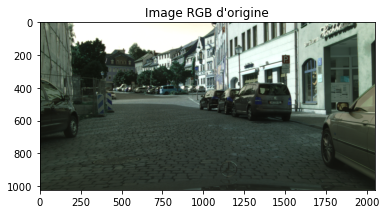

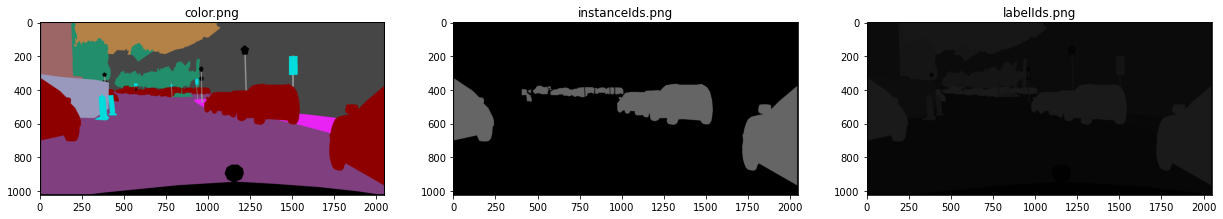

In [9]:
img = cv2.imread(os.path.join(leftImg8bit_path, 'train', random_city, list_files_leftImg8bit[random_index]))
plt.title(f"Image RGB d'origine")
plt.imshow(img)

plt.subplots(1, 3, figsize=(21,5))
for i in range(3):
    img = cv2.imread(os.path.join(gtFine_path, 'train', random_city, list_files_gtFine[random_index*4 + i]))
    # Afficher l'image
    plt.subplot(1, 3, i+1)
    plt.title(substring_after(list_files_gtFine[random_index*4 + i], 'gtFine_'))
    plt.imshow(img)
plt.show()

In [10]:
for i in range(3):
    img = cv2.imread(os.path.join(gtFine_path, 'train', random_city, list_files_gtFine[random_index*4 + i]))

    na = np.array(img)
    colours, counts = np.unique(na.reshape(-1,3), axis=0, return_counts=1)

    print(f"{substring_after(list_files_gtFine[random_index*4 + i], 'gtFine_')} :")

    for j in range(len(colours)):
        print(f"    {colours[j]}: {counts[j]}")

color.png :
    [0 0 0]: 116910
    [  0 220 220]: 17411
    [ 35 142 107]: 108207
    [70 70 70]: 529474
    [128  64 128]: 759856
    [142   0   0]: 312736
    [153 153 153]: 4351
    [153 153 190]: 54981
    [156 102 102]: 59275
    [180 130  70]: 115151
    [232  35 244]: 18800
instanceIds.png :
    [0 0 0]: 1785252
    [101 101 101]: 311900
labelIds.png :
    [1 1 1]: 81534
    [3 3 3]: 31634
    [4 4 4]: 3742
    [7 7 7]: 759856
    [8 8 8]: 18800
    [11 11 11]: 529474
    [12 12 12]: 59275
    [13 13 13]: 54981
    [17 17 17]: 4351
    [20 20 20]: 17411
    [21 21 21]: 108207
    [23 23 23]: 115151
    [26 26 26]: 312736


In [98]:
cats = {'void': [0, 1, 2, 3, 4, 5, 6],
 'flat': [7, 8, 9, 10],
 'construction': [11, 12, 13, 14, 15, 16],
 'object': [17, 18, 19, 20],
 'nature': [21, 22],
 'sky': [23],
 'human': [24, 25],
 'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]
 }

cats_id = {
 'void': (0),
 'flat': (1),
 'construction': (2),
 'object': (3),
 'nature': (4),
 'sky': (5),
 'human':(6),
 'vehicle': (7)
}

cats_colors = {
 'void': (0,0,0),
 'flat': (50,50,50),
 'construction': (150,150,150),
 'object': (255,0,0),
 'nature': (0,255,0),
 'sky': (0,0,255),
 'human':(200,200,0),
 'vehicle': (150,0,200)
}

In [152]:
img = cv2.imread(os.path.join(gtFine_path, 'train', random_city, list_files_gtFine[random_index*4 + 2]))
img = np.squeeze(img[:,:,0])
mask_labelids = np.zeros((img.shape[0], img.shape[1], len(cats_id)))

for i in range(-1, 34):
    for cat in cats:
        if i in cats[cat]:
            mask_labelids[:,:,cats_id[cat]] = np.logical_or(mask_labelids[:,:,cats_id[cat]],(img==i))
            break

mask_labelids = np.array(np.argmax(mask_labelids,axis=2))

In [153]:
colours, counts = np.unique(mask_labelids, return_counts=1)

print(f"{substring_after(list_files_gtFine[random_index*4 + 2], 'gtFine_')} :")

for j in range(len(colours)):
    print(f"    {colours[j]}: {counts[j]}")

labelIds.png :
    0: 116910
    1: 778656
    2: 643730
    3: 21762
    4: 108207
    5: 115151
    7: 312736


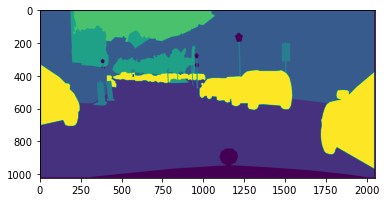

In [155]:
plt.imshow(mask_labelids)